## ** Identifying if a message is spam or not**
#UCI database

## **Read dataset**

In [1]:
# the tab is the seperated between features, nd there is no header
import pandas as pd
dataset = pd.read_csv("SMSSpamCollection", sep = "\t", header = None)
dataset.head(5)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Explore the dataset**

In [2]:
# read the dataset
# Adding column names
dataset = pd.read_csv("SMSSpamCollection", sep = "\t", header = None)
dataset.columns = ['label',"sms"]
dataset.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dataset.shape

(5572, 2)

In [4]:
#ham vs spam
print(len(dataset[dataset["label"]=="spam"]))
print(len(dataset[dataset["label"]=="ham"]))

747
4825


In [5]:
# check missing data
dataset["label"].isnull().sum()

0

In [6]:
# check missing data
dataset["sms"].isnull().sum()

0

# Preprocessing

Remove punctiation



In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Remove stopwords

In [11]:
import nltk
nltk.download() # downloading all the packages

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [12]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
pd.set_option("display.max_colwidth",100)
dataset.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# **All in one**

In [14]:
wn = nltk.WordNetLemmatizer()

# **TF-IDF Vectorizer**

In [15]:
df4 = pd.read_csv("SMSSpamCollection", sep = "\t", header = None)
df4.columns = ['label',"sms"]
df4.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [18]:
#using Regex library for word tokenization
import re
def clean_txt3(text):
   text ="".join([c for c in text if c not in string.punctuation])
   tokens = re.split('\W+',text)
   text = [wn.lemmatize(word) for word in tokens if word not in stopwords] # it would make it sentence instead of list of tokens!
   return text

In [19]:
df4["clean_txt"] = df4["sms"].apply(lambda x: clean_txt3(x.lower()))
df4.head()

,label,sms,clean_txt
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"


In [20]:
# creating a document-term matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer() # use the clean text def created

# transforms it to matrices    # sentences by number of words
# fit the main, raw data
data_sample_3 = df4[0:5572] # Get a sample of the whole data
X2 = tfidf_vect.fit_transform(data_sample_3["sms"]) # fit_transforms a sentence, not list of words
print(X2.shape)

(5572, 8713)


In [21]:
dtest3 = pd.DataFrame(X2.toarray(), columns = tfidf_vect.get_feature_names())
dtest3.head(10)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,0207,02072069400,02073162414,02085076972,021,03,04,0430,05,050703,0578,06,07,07008009200,07046744435,07090201529,07090298926,07099833605,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,...,youphone,your,youre,yourinclusive,yourjob,yours,yourself,youuuuu,youwanna,yoville,yowifes,yoyyooo,yr,yrs,ystrday,ything,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.263593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.106534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
dtest3.shape

(5572, 8713)

# **Feature Engineering**

In [23]:
df5 = pd.read_csv("SMSSpamCollection", sep = "\t", header = None)
df5.columns = ['label',"sms"]
df5.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Create Feature; message length

In [24]:
df5["sms_length"] = df5["sms"].apply(lambda x:len(x))
df5.head(5)


,label,sms,sms_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


**Create Feature; punctuation usage**

In [25]:
# looking through each character and finding if it is a punctuation or not
def punctuation_count(txt):
  count = sum([1 for c in txt if c in string.punctuation])
  return 100*count/len(txt)

In [26]:
df5["punctuation_%"] = df5["sms"].apply(lambda x:punctuation_count(x))
df5.head(5)

,label,sms,sms_length,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689


In [27]:
df5.shape

(5572, 4)

Feature Evaluation

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

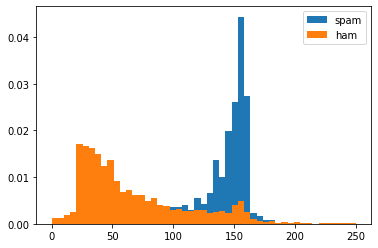

In [29]:
# plot message length for ham and spam
bins = np.linspace(0,250,50) # linspce is dividing  length
plt.hist(df5[df5["label"]=="spam"]["sms_length"], bins, label = "spam", density= True) # density is normalizing the data
plt.hist(df5[df5["label"]=="ham"]["sms_length"], bins, label = "ham", density= True)
plt.legend(loc = "upper right")
plt.show()

Interpretation:length of spam sms are longer, as their frequency in higher lengths are more 

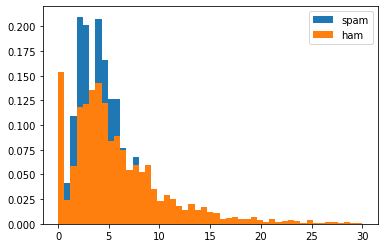

In [30]:
# plotpunctuation percentage
bins = np.linspace(0,30,50) # linspce is dividing  length    [Start, end, steps]
plt.hist(df5[df5["label"]=="spam"]["punctuation_%"], bins, label = "spam", density= True) # density is normalizing the data
plt.hist(df5[df5["label"]=="ham"]["punctuation_%"], bins, label = "ham", density= True)
plt.legend(loc = "upper right")
plt.show()

Power Transformation; How to transform with not normally distributed data

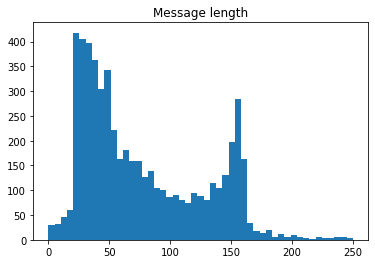

In [31]:
bins = np.linspace(0,250,50) # linspce is dividing  length    [Start, end, steps]
plt.hist(df5["sms_length"], bins)
plt.title("Message length")
plt.show()

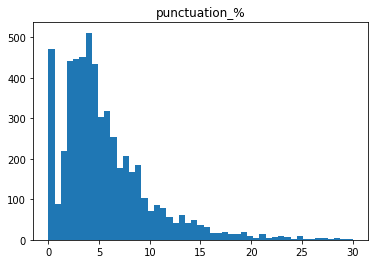

In [32]:
bins = np.linspace(0,30,50) # linspce is dividing  length    [Start, end, steps]
plt.hist(df5["punctuation_%"], bins)
plt.title("punctuation_%")
plt.show()
# data is skewed

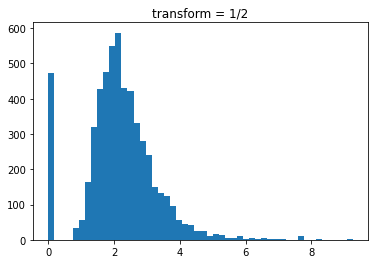

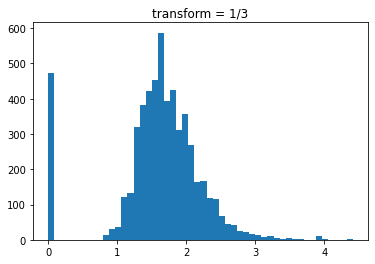

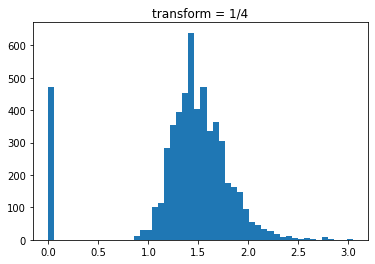

In [33]:
# transformation
# the freuency is high around 5
# i is the expoenent, the power that the data is going to
for i in [2,3,4]:
  plt.hist((df5["punctuation_%"])**(1/i), bins = 50)
  plt.title(f"transform = 1/{i}")
  plt.show()

Defining the x and y

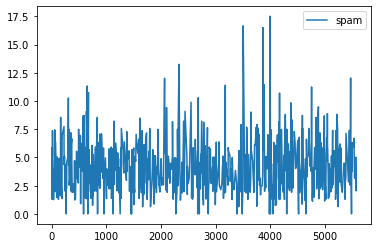

In [34]:
# plotpunctuation percentage
plt.plot(df5[df5["label"]=="spam"]["punctuation_%"], label = "spam") # density is normalizing the data
plt.legend(loc = "upper right")
plt.show()

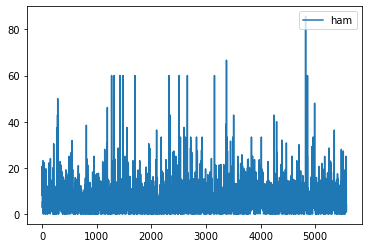

In [35]:
# plotpunctuation percentage
plt.plot(df5[df5["label"]=="ham"]["punctuation_%"], label = "ham") # density is normalizing the data
plt.legend(loc = "upper right")
plt.show()

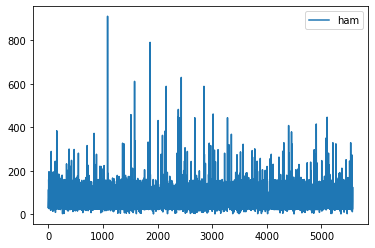

In [36]:
plt.plot(df5[df5["label"]=="ham"]["sms_length"], label = "ham") # density is normalizing the data
plt.legend(loc = "upper right")
plt.show()

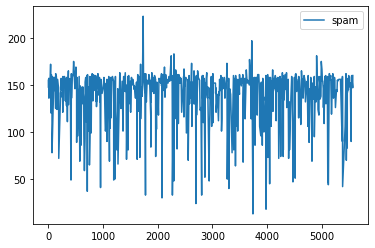

In [37]:
plt.plot(df5[df5["label"]=="spam"]["sms_length"], label = "spam") # density is normalizing the data
plt.legend(loc = "upper right")
plt.show()

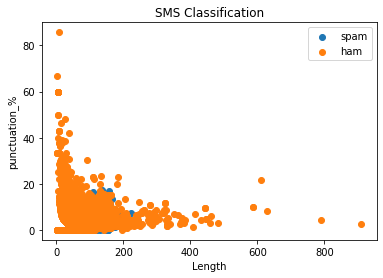

In [38]:
plt.scatter(df5[df5["label"]=="spam"]["sms_length"], df5[df5["label"]=="spam"]["punctuation_%"],label = "spam")
plt.scatter(df5[df5["label"]=="ham"]["sms_length"], df5[df5["label"]=="ham"]["punctuation_%"],label = "ham")
plt.xlabel('Length')
plt.ylabel('punctuation_%')
plt.title('SMS Classification')
plt.legend(loc = "upper right")
plt.show()
#(df5[df5["label"]=="spam"]["punctuation_%"]

# **Create ML**

In [39]:
Y = df5["label"]

In [40]:
X = dtest3
X.shape

(5572, 8713)

In [41]:
# making the Y values categorical
df5.label = pd.Categorical(df5.label)
df5['PASS'] = df5.label.cat.codes
df5["PASS"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: PASS, Length: 5572, dtype: int8

In [42]:
Y = df5["PASS"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli')]

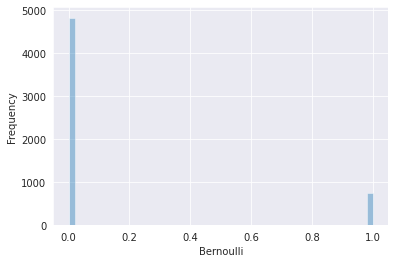

In [43]:
# visualizing the share for each category in the bernouli distribution
import seaborn as sns
sns.set_style("darkgrid")
freq = sns.distplot(Y,kde = False)
#                     color="blue",  
#                     hist_kws={"linewidth": 20,'alpha':1})
#                     
freq.set(xlabel='Bernoulli', ylabel='Frequency')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 5)

In [46]:
X_train.shape

(4179, 8713)

In [47]:
#Text Calssification
from sklearn.naive_bayes import GaussianNB # independence among predictors

In [48]:
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train,Y_train).predict(X_test)

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
clf = MultinomialNB()

In [51]:
clf.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
print(metrics.accuracy_score(Y_test, y_pred_gnb))

0.9002153625269204


In [53]:
score_clf = confusion_matrix(Y_test, y_pred_gnb)
score_clf

array([[1087,  118],
       [  21,  167]])